In [4]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.argv=['']
del sys
os.chdir("../")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import json
import math
import torch
import numpy
import pandas
import logging
import numpy as np
from tslearn.metrics import dtw

from IPython import embed
from common import scikit_wrappers, data_preprocess 
from common.utils import print_to_json
from common.dataloader import load_SMD_dataset, load_CSV_dataset, load_SMAP_MSL_dataset
from common.sliding import BatchSlidingWindow, WindowIterator
from common.config import parse_arguments, set_logger, initialize_config


args = parse_arguments()

%matplotlib inline

ImportError: cannot import name 'scikit_wrappers'

In [6]:
# load config
config_dir = "./hypers/" if not args["load"] else args["load"]
params = initialize_config(config_dir, args)

# load & preprocess data
data_dict = load_SMAP_MSL_dataset(params["path"], params["dataset"])

NameError: name 'args' is not defined

In [7]:
print(data_dict["SMAP"]["test"].shape)
print(data_dict["SMAP"]["test_label"].shape)

NameError: name 'data_dict' is not defined

In [ ]:
from alibi_detect.od import SpectralResidual

In [ ]:
od = SpectralResidual(
    threshold=None,  # threshold for outlier score
    window_amp=20,   # window for the average log amplitude
    window_local=20, # window for the average saliency map
    n_est_points=20  # nb of estimated points padded to the end of the sequence
)

In [ ]:
data_dict["SMAP"]["test_label"].sum() / 427617

In [ ]:
x = data_dict["SMAP"]["test"].sum(axis=1)
y = data_dict["SMAP"]["test_label"].reshape(-1,1)

In [ ]:
np.where(y==1)[0][80:220]

In [ ]:
plt.plot(x[12500:13200])

In [ ]:
# for i in range(25):
plt.plot(data_dict["SMAP"]["test"][12000:13200,0])

In [1]:
# for i in range(25):
plt.plot(od.saliency_map(data_dict["SMAP"]["test"][12000:13200,0]))

NameError: name 'plt' is not defined

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
od.infer_threshold(x, threshold_perc=90)
preds = od.predict(
    x.reshape(-1,1),
    return_instance_score=True
)
prediction = preds["data"]["is_outlier"]
print(f1_score(y, prediction), recall_score(y, prediction))

0.12739846908411828 0.11350007313149042


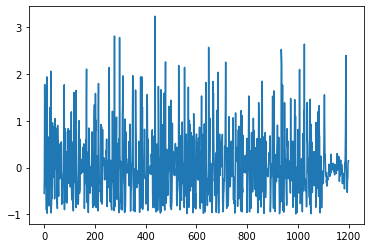

In [170]:
pred = od.predict(data_dict["SMAP"]["test"][12000:13200, 0], return_instance_score=True)
score = pred["data"]["instance_score"]
plt.plot(score)

In [172]:
a = np.random.randn(3,4)
b = np.random.randn(3,1)

In [175]:
np.hstack([a,b])

array([[-0.44863155,  0.48954591, -0.51656386, -0.24428562,  0.02824845],
       [ 0.95935981,  2.97071184, -0.53513285,  0.58627994,  0.73206677],
       [ 0.30520145, -0.62578412, -1.5930787 ,  1.05764286, -2.14586576]])